In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات

df = pd.read_csv("General_Education_School.csv")  

print(df.head())  

# print(df.columns) 

      DBN                     School Name               School Type  \
0     dbn                    locationname                       NaN   
1  01M015       P.S. 015 Roberto Clemente         Elementary School   
2  01M019             P.S. 019 Asher Levy         Elementary School   
3  01M020            P.S. 020 Anna Silver         Elementary School   
4  01M034  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   

  Parent Response Rate Teacher Response Rate Student Response Rate  \
0                 rr_p                  rr_t                  rr_s   
1                  61%                   92%                   NaN   
2                  92%                   94%                   NaN   
3                  88%                   73%                   NaN   
4                  39%                   58%                   96%   

  Total Safety and Respect Score Total Communication Score  \
0                     saf_tot_12                com_tot_12   
1                           

In [17]:
print(df.columns)  # طباعة أسماء الأعمدة للتأكد من وجودها

Index(['DBN', 'School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')


(Exploratory Data Analysis)

In [18]:
num_schools = df['DBN'].nunique()

print(f"عدد المدارس المشاركة: {num_schools}")

# أنواع المدارس
school_types = df['School Type'].value_counts()
print("\nأنواع المدارس:")
print(school_types)

عدد المدارس المشاركة: 1668

أنواع المدارس:
School Type
Elementary School                617
High School                      352
Middle School                    293
Elementary/Middle School         160
Middle/High School                87
Early Childhood School            83
Transfer High School              49
YABC                              22
Elementary/Middle/High School      7
Name: count, dtype: int64



# نسب الاستجابة من الأهالي، المعلمين، الطلاب

In [19]:
response_cols = ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']

# تحويل النسب المئوية إلى أرقام (مثلاً "61%" → 61.0)
for col in response_cols:
    if col in df.columns:
        df[col] = df[col].str.replace('%', '', regex=False).replace('rr_p', None).replace('rr_t', None).replace('rr_s', None)
        df[col] = pd.to_numeric(df[col], errors='coerce')

        print(f"\nتحليل {col}:")
        print(df[col].describe())


تحليل Parent Response Rate:
count    1670.000000
mean       56.365269
std        25.009922
min         1.000000
25%        37.000000
50%        57.000000
75%        76.000000
max       100.000000
Name: Parent Response Rate, dtype: float64

تحليل Teacher Response Rate:
count    1670.000000
mean       83.410180
std        17.428378
min         0.000000
25%        75.000000
50%        88.000000
75%        97.000000
max       100.000000
Name: Teacher Response Rate, dtype: float64

تحليل Student Response Rate:
count    995.000000
mean      84.544724
std       16.129966
min        0.000000
25%       79.000000
50%       90.000000
75%       96.000000
max      100.000000
Name: Student Response Rate, dtype: float64


Deep claning

In [20]:
for col in df.columns:
    if df[col].nunique() == 1: 
        print(f"العمود '{col}' يحتوي على قيمة ثابتة في جميع الصفوف")


missing_percentage = df.isnull().mean() * 100
print("\nالأعمدة التي تحتوي على قيم مفقودة بنسبة أكبر من 50%:")
print(missing_percentage[missing_percentage > 50])

df = df.drop(columns=['DBN'], errors='ignore')



الأعمدة التي تحتوي على قيم مفقودة بنسبة أكبر من 50%:
Series([], dtype: float64)


In [21]:

numeric_cols = [
    'Parent Response Rate',
    'Teacher Response Rate',
    'Student Response Rate',
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df[numeric_cols].corr()

print("مصفوفة الارتباط بين الأعمدة:")
print(correlation_matrix)


threshold = 0.95  # يمكن تعديل العتبة
merged_columns = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            merged_columns.append(colname)
            print(f"تم العثور على ارتباط قوي بين العمودين: {correlation_matrix.columns[i]} و {correlation_matrix.columns[j]}")

for col in merged_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())  



مصفوفة الارتباط بين الأعمدة:
                                   Parent Response Rate  \
Parent Response Rate                           1.000000   
Teacher Response Rate                          0.313786   
Student Response Rate                          0.553581   
Total Safety and Respect Score                 0.499228   
Total Communication Score                      0.476736   
Total Engagement Score                         0.455845   
Total Academic Expectations Score              0.423578   

                                   Teacher Response Rate  \
Parent Response Rate                            0.313786   
Teacher Response Rate                           1.000000   
Student Response Rate                           0.263486   
Total Safety and Respect Score                  0.218922   
Total Communication Score                       0.274939   
Total Engagement Score                          0.271420   
Total Academic Expectations Score               0.285595   

                 

In [22]:
print("\nالبيانات بعد دمج الأعمدة المترابطة:")
print(df.head())


البيانات بعد دمج الأعمدة المترابطة:
                      School Name               School Type  \
0                    locationname                       NaN   
1       P.S. 015 Roberto Clemente         Elementary School   
2             P.S. 019 Asher Levy         Elementary School   
3            P.S. 020 Anna Silver         Elementary School   
4  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   

   Parent Response Rate  Teacher Response Rate  Student Response Rate  \
0                   NaN                    NaN                    NaN   
1                  61.0                   92.0                    NaN   
2                  92.0                   94.0                    NaN   
3                  88.0                   73.0                    NaN   
4                  39.0                   58.0                   96.0   

   Total Safety and Respect Score  Total Communication Score  \
0                             NaN                        NaN   
1                

Data Cleaning

In [23]:


print(df.isnull().sum())


for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

df['School Type'] = df['School Type'].fillna(df['School Type'].value_counts())


print("\nعدد القيم الناقصة في كل عمود بعد المعالجة:")
print(df.isnull().sum())

School Name                            0
School Type                            1
Parent Response Rate                   1
Teacher Response Rate                  1
Student Response Rate                676
Total Safety and Respect Score         1
Total Communication Score              1
Total Engagement Score                 1
Total Academic Expectations Score      0
dtype: int64

عدد القيم الناقصة في كل عمود بعد المعالجة:
School Name                          0
School Type                          1
Parent Response Rate                 0
Teacher Response Rate                0
Student Response Rate                0
Total Safety and Respect Score       0
Total Communication Score            0
Total Engagement Score               0
Total Academic Expectations Score    0
dtype: int64


In [24]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['Student Response Rate'] = pd.to_numeric(df['Student Response Rate'], errors='coerce')

# معالجة القيم الناقصة في الأعمدة الرقمية
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

df['Student Response Rate'] = df['Student Response Rate'].fillna(df['Student Response Rate'].mean())


# طباعة القيم الناقصة بعد المعالجة
print("\nعدد القيم الناقصة في كل عمود بعد المعالجة:")
print(df.isnull().sum())


عدد القيم الناقصة في كل عمود بعد المعالجة:
School Name                          0
School Type                          1
Parent Response Rate                 0
Teacher Response Rate                0
Student Response Rate                0
Total Safety and Respect Score       0
Total Communication Score            0
Total Engagement Score               0
Total Academic Expectations Score    0
dtype: int64


Deep Dive

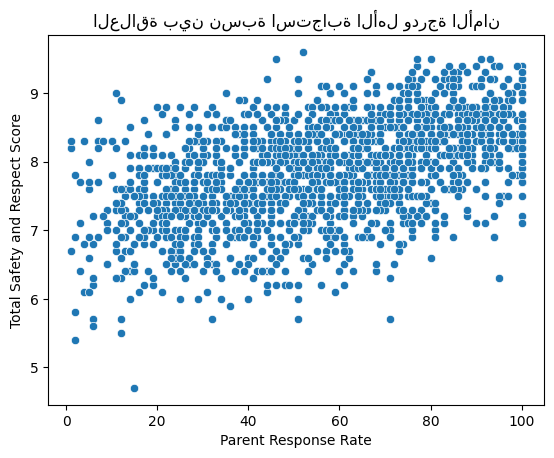

In [25]:
if 'Parent Response Rate' in df.columns and 'Total Safety and Respect Score' in df.columns:
    sns.scatterplot(data=df, x='Parent Response Rate', y='Total Safety and Respect Score')
    plt.title("العلاقة بين نسبة استجابة الأهل ودرجة الأمان")
    plt.xlabel("Parent Response Rate")
    plt.ylabel("Total Safety and Respect Score")
    plt.show()


In [26]:

# أعلى نوع مدرسة من حيث التقييم العام (مثال: درجة الأكاديميا)
if 'School Type' in df.columns and 'Total Academic Expectations Score' in df.columns:
    avg_by_type = df.groupby('School Type')['Total Academic Expectations Score'].mean().sort_values(ascending=False)
    print("\nمتوسط التوقعات الأكاديمية حسب نوع المدرسة:")
    print(avg_by_type)




متوسط التوقعات الأكاديمية حسب نوع المدرسة:
School Type
YABC                             8.368182
Early Childhood School           8.360241
Elementary School                8.051053
Transfer High School             8.044898
Elementary/Middle School         7.961250
Middle School                    7.807167
High School                      7.530966
Middle/High School               7.514943
Elementary/Middle/High School    7.514286
Name: Total Academic Expectations Score, dtype: float64


In [27]:
q1 = df['Total Academic Expectations Score'].quantile(0.25)
q3 = df['Total Academic Expectations Score'].quantile(0.75)
iqr = q3 - q1

# تحديد المدارس الاستثنائية
outliers = df[
    (df['Total Academic Expectations Score'] < q1 - 1.5 * iqr) |
    (df['Total Academic Expectations Score'] > q3 + 1.5 * iqr)
]

print(f"\n📌 عدد المدارس الاستثنائية (بناءً على توقعات أكاديمية): {len(outliers)}")
print(outliers[['School Name', 'School Type', 'Total Academic Expectations Score']].head(12))  # عرض أول 10 فقط



📌 عدد المدارس الاستثنائية (بناءً على توقعات أكاديمية): 12
                                            School Name  \
165                   Manhattan Theatre Lab High School   
243   Academy For Social Action: A College Board School   
244       Urban Assembly School For The Performing Arts   
366                       Women'S Academy Of Excellence   
393                            Banana Kelly High School   
614                          P.S. 044 David C. Farragut   
830              The Brooklyn Academy Of Global Finance   
902                   Brooklyn Theatre Arts High School   
1176                                    P.S. 120 Queens   
1343                    Queens Metropolitan High School   
1606            New York French American Charter School   
1670            New York French American Charter School   

                 School Type  Total Academic Expectations Score  
165              High School                                5.5  
243       Middle/High School             

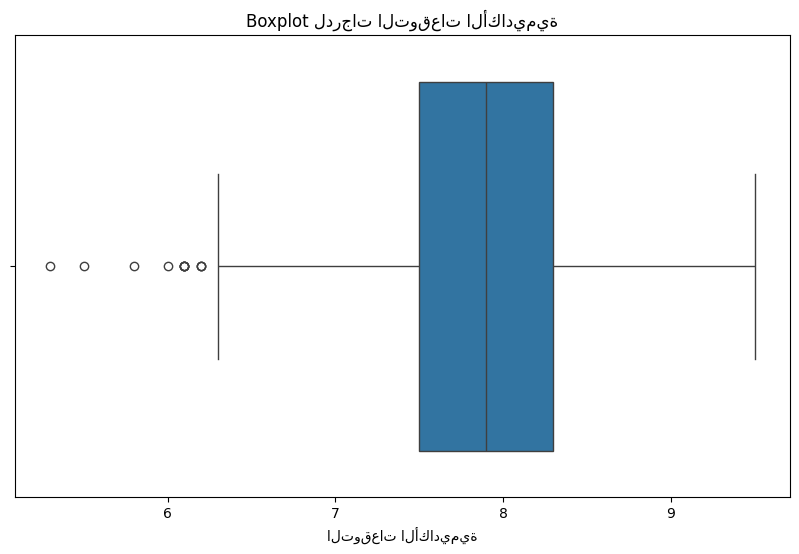

In [28]:


plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total Academic Expectations Score'])
plt.title("Boxplot لدرجات التوقعات الأكاديمية")
plt.xlabel("التوقعات الأكاديمية")
plt.show()



متوسط Total Academic Expectations Score حسب نوع المدرسة:
School Type
YABC                             8.368182
Early Childhood School           8.360241
Elementary School                8.051053
Transfer High School             8.044898
Elementary/Middle School         7.961250
Middle School                    7.807167
High School                      7.530966
Middle/High School               7.514943
Elementary/Middle/High School    7.514286
Name: Total Academic Expectations Score, dtype: float64

متوسط Total Safety and Respect Score حسب نوع المدرسة:
School Type
Early Childhood School           8.615663
YABC                             8.377273
Elementary School                8.273906
Transfer High School             8.091837
Elementary/Middle School         7.661250
Elementary/Middle/High School    7.471429
Middle School                    7.455290
Middle/High School               7.398851
High School                      7.394886
Name: Total Safety and Respect Score, dtype: float6

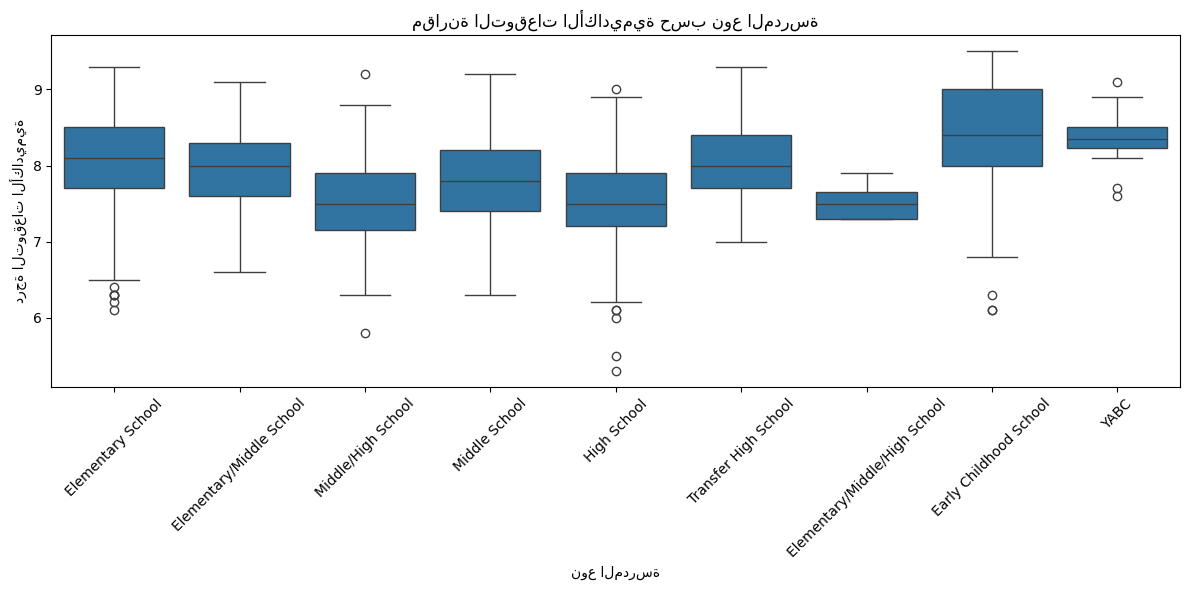

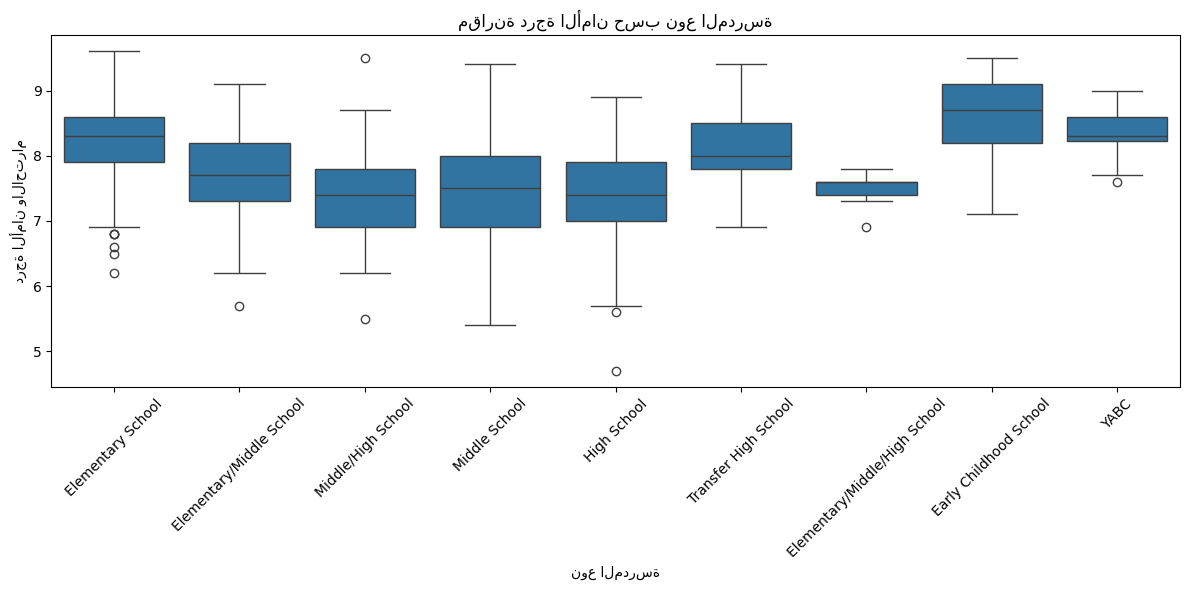

In [29]:
# عرض المتوسطات لكل نوع مدرسة
score_columns = [
    'Total Academic Expectations Score',
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score'
]

# حساب المتوسطات
for col in score_columns:
    print(f"\nمتوسط {col} حسب نوع المدرسة:")
    print(df.groupby('School Type')[col].mean().sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='School Type', y='Total Academic Expectations Score')
plt.xticks(rotation=45)
plt.title("مقارنة التوقعات الأكاديمية حسب نوع المدرسة")
plt.ylabel("درجة التوقعات الأكاديمية")
plt.xlabel("نوع المدرسة")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='School Type', y='Total Safety and Respect Score')
plt.xticks(rotation=45)
plt.title("مقارنة درجة الأمان حسب نوع المدرسة")
plt.ylabel("درجة الأمان والاحترام")
plt.xlabel("نوع المدرسة")
plt.tight_layout()
plt.show()


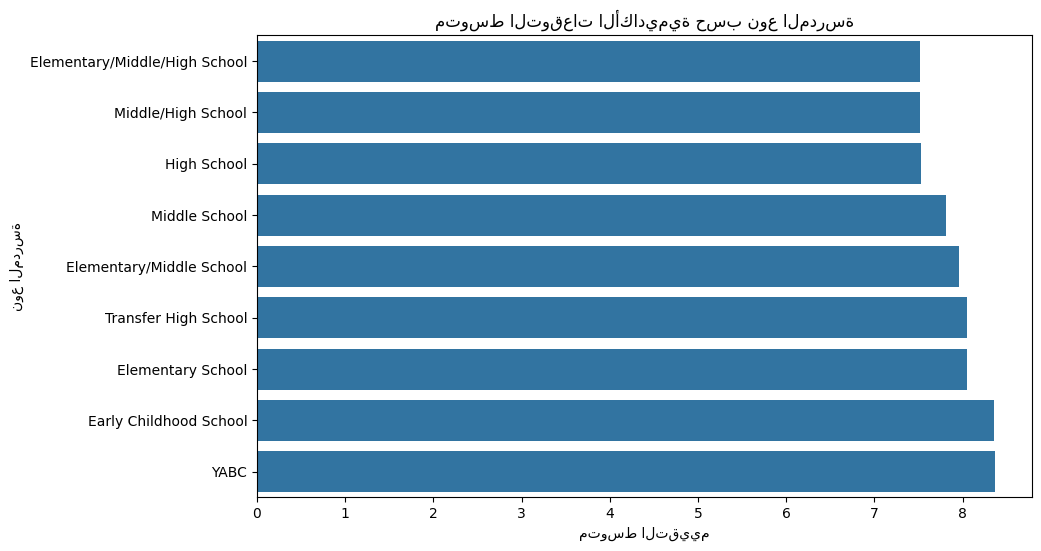

In [30]:
plt.figure(figsize=(10, 6))
avg_scores = df.groupby('School Type')['Total Academic Expectations Score'].mean().sort_values()
sns.barplot(x=avg_scores.values, y=avg_scores.index)
plt.title("متوسط التوقعات الأكاديمية حسب نوع المدرسة")
plt.xlabel("متوسط التقييم")
plt.ylabel("نوع المدرسة")
plt.show()
